In [15]:
import os, glob 
import random
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
import torch
import utils
import tkinter as tk
import albumentations as A
from distributed_sampler_no_evenly_divisible import *
import torch.utils.data.distributed 

In [16]:
root = '/home/zmh/hdd/Projects/Group-A/Depth_Map/dataset/realsense_jp'
imgs = []
for file in glob.glob(os.path.join(root, 'train') + '**/**/*Color_*', recursive = True):
    imgs.append(file) 

print(imgs.__len__())

10804


In [17]:
def show(img, mode = 'cv2'):
    if mode == 'cv2':
        cv2.imshow('test', img); cv2.waitKey(0); cv2.destroyAllWindows()
    elif mode == 'plt':
        if img.ndim == 2:
            cmap = input('Type cmap : ')
            plt.imshow(img, cmap = cmap); plt.show()
        else: 
            plt.imshow(img); plt.show()
            
def add_mask(depth, mask):
    MIN_DEPTH = 0.0
    MAX_DEPTH = min(300, np.percentile(depth, 99))
    depth = np.clip(depth, MIN_DEPTH, MAX_DEPTH) 
    depth[mask==0] = 0
    return depth

def load_img(file, size):
    if file.endswith('.npy') == 1:
        img = cv2.resize(np.load(file), (size))
    else:
        img = cv2.resize(cv2.imread(file), (size))
    return img

def to_color(img): 
    color = cv2.applyColorMap(cv2.convertScaleAbs(img, alpha=0.03), cv2.COLORMAP_JET)[:,:,::-1]    
    return color

def to_numpy(img, cmap = 'gray'):
    if img.shape[0] == 3:
        img = img.permute(1,2,0).numpy()
    elif img.shape[0] == 1:
        img = img.squeeze().numpy()
    return img

to_tensor = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


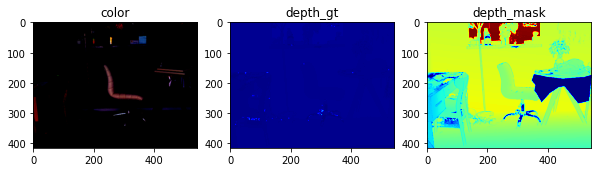

In [13]:
color_path = '/home/zmh/hdd/Projects/Group-A/Depth_Map/evaluation_depth_map/server_pc/diode_samples/00019_00183_indoors_130_040.png'
depth_path = color_path[:-4] + '_depth.npy'
mask_path = color_path[:-4] + '_depth_mask.npy'
size = (544, 416)
image = load_img(color_path, size)[...,::-1]
depth_gt = load_img(depth_path, size).squeeze()
mask = load_img(mask_path, size)
depth_mask = add_mask(depth_gt, mask)

tensor_img = to_tensor(Image.fromarray(image))
np_img  = to_numpy(tensor_img)
utils.compare_plot(figsize = (10,10), cmap = 'jet', color = np_img, depth_gt = depth_gt, depth_mask= depth_mask)


In [24]:
image_path = imgs[random]
depth_path = image_path.replace('Color', 'Depth')

image = cv2.imread(image_path)[...,::-1]
depth_gt = cv2.imread(depth_path, cv2.IMREAD_ANYDEPTH)


# show(image, mode = 'plt')


In [25]:
depth_gt[depth_gt > 9500] = 0

In [27]:
wd = tk.Tk()
utils.app(wd, image , depth_gt, depth_gt)
wd.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/zmh/.conda/envs/dl/lib/python3.6/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/zmh/hdd/Projects/Group-A/Depth_Map/evaluation_depth_map/server_pc/utils.py", line 68, in on_button_release
    info = self.object_details()
  File "/home/zmh/hdd/Projects/Group-A/Depth_Map/evaluation_depth_map/server_pc/utils.py", line 155, in object_details
    if self.start_x < self.curX and self.start_y < self.curY:
AttributeError: 'app' object has no attribute 'curX'


In [28]:
image_path

'/home/zmh/hdd/Projects/Group-A/Depth_Map/dataset/realsense_jp/train/yamamoto1/Color_yamamoto1_4100.png'

In [34]:
depth_gt.astype('float32').max()

9496.0

In [33]:
depth_gt.max()

9496